In [1]:
!pip install astroplan

    100% |████████████████████████████████| 276kB 9.7MB/s eta 0:00:01
  Running setup.py bdist_wheel for astroplan ... done
  Stored in directory: /home/nbuser/.cache/pip/wheels/ea/4d/8e/765bbe02bf38e8bb2e7f400d30b1e1483c264f60776807fe2b
Successfully built astroplan


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import EarthLocation
from astropy.time import Time

/home/nbuser/anaconda3_501/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/nbuser/anaconda3_501/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Number of fields:  108


Text(0,0.5,'DEC (deg)')

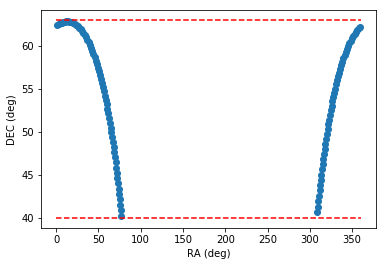

In [4]:
glat = 0.0
glon_start = 80
glon_end = 167
step = 0.8

print('Number of fields: ',int((glon_end-glon_start)/step))

ra = np.zeros(100)
dec = np.zeros(100)
glon = np.arange(glon_start,glon_end,step)

fields = SkyCoord(glon,glat,frame='galactic',unit='deg')
fields_ra = fields.fk5.ra
fields_dec = fields.fk5.dec

plt.scatter(fields_ra,fields_dec)
plt.plot([0.0,360.0],[63.0,63.0],'r--')
plt.plot([0.0,360.0],[40.0,40.0],'r--')
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')

In [5]:
from astroplan import Observer, FixedTarget
from astroplan import (AltitudeConstraint, AirmassConstraint, AtNightConstraint)
from astroplan.plots import plot_airmass
from astroplan import is_observable, is_always_observable, months_observable
from astroplan import download_IERS_A
download_IERS_A()

/home/nbuser/anaconda3_501/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [7]:
longitude = -2.0
latitude = +56.0
elevation = 30.0 * u.m
stand = EarthLocation.from_geodetic(longitude, latitude, elevation)
jgt = Observer(name='jgt',location=stand)
time = Time('2018-08-16 22:00:00')
constraints = [AltitudeConstraint(30*u.deg, 80*u.deg),AirmassConstraint(2), AtNightConstraint.twilight_civil()]

(0.9, 2.5)

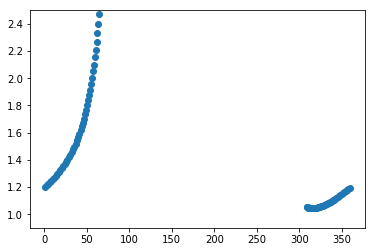

In [10]:
airmass = np.zeros(len(fields))
for i in np.arange(len(fields)):
     airmass[i] = jgt.altaz(time, fields[i]).secz
plt.scatter(fields_ra,airmass)
plt.ylim(0.9,2.5)

In [12]:
min_airmass = np.argmin(airmass)
bestfield_ra = fields_ra[min_airmass]
bestfield_dec = fields_dec[min_airmass]
best_field_string = bestfield_ra.to_string(u.hour) + ' ' + bestfield_dec.to_string(u.degree)

print('Best field: ',best_field_string , ' at airmass ',airmass[min_airmass])

Best field:  21h03m59.6345s 46d51m22.8864s  at airmass  1.0445577049216206
